In [503]:
import numpy as np
from matplotlib import pyplot as plt 
from pandas import read_csv
import sys
import os
from matplotlib import rcParams
import toml

from correlations import *
from read_in_data import *
from mass_fit import *
from mass_matteo import *
from functions import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [627]:
param = ("fermions", "fermion_mass")
folder = "./data/looking4pt/s_1/0/"
simulations = []
subfolders = os.listdir(folder)
for sf in subfolders:
    dataset = Dataset(32, 32)
    dataset.add_data(folder + sf + "/", param, 0)
    print(sf, "mphi2:", dataset.toml_params['physics']['mass'])
    simulations.append(dataset)

conf69 mphi2: 0.0


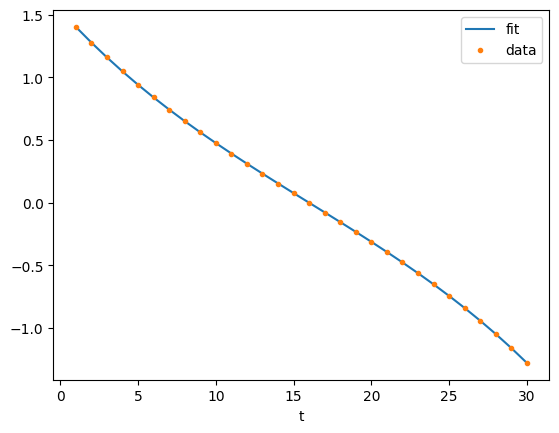

0.07387555270663834 1.039351007216861
0.07387555270663834 1.039351007216861


In [628]:
data = []
for sim in simulations:
    
    if (sim.toml_params[param[0]][param[1]] >= -10):
        val, err = sim.compute_mqphys(plotting=True)
        data.append((sim.toml_params[param[0]][param[1]], val, err))
        print(val, err)

In [629]:
params, vals, errs = sort_data(data)        

try:
    p, V = np.polyfit(params[1:], vals[1:], 1, full=False, cov=True)
    m, b = p
    err_m = V[0,0]
    err_b = V[1,1]
    m_crit = -b/m
    err_m_crit = abs(m_crit) * np.sqrt((err_m/m)**2 + (err_b/b)**2)
except:
    m, b = np.polyfit(params[1:], vals[1:], 1)
    m_crit = -b/m
    err_m_crit = 0



xline = np.linspace(-0.0, 0.2, 1000)
plt.plot(xline, m*xline + b, '--', color='black')
plt.grid()
plt.plot(params, vals, 'o--', markersize=4, color='orange')
plt.errorbar([m_crit], [m*m_crit + b], [err_m_crit], fmt='.r', markersize=8)
plt.xlabel(r"$m_{q,0}$")
plt.ylabel(r"$m_{q, phys}$")
plt.tight_layout()
plt.savefig("extr_mass.pdf")
plt.show()

print("critical mass:", m_crit, err_m_crit)

TypeError: expected non-empty vector for x

In [618]:
data = []
for sim in simulations:
    
    if (sim.toml_params[param[0]][param[1]] > -10):
        val, err = sim.compute_abs_mag(printing=False)
        data.append((sim.toml_params[param[0]][param[1]], val, err))
        print(val, err)

0.39479035264410783 0.0005096661163458739


In [619]:
params, vals, errs = sort_data(data) 

try:
    p, V = np.polyfit(params[:4], vals[:4], 1, full=False, cov=True)
    m, b = p
    err_m = V[0,0]
    err_b = V[1,1]
    
    crit_val = m*(m_crit) + b
    err_crit_val = np.sqrt((m_crit*err_m)**2 + (m*err_m_crit)**2 + err_b**2)
except:
    m, b = np.polyfit(params[1:], vals[1:], 1)
    crit_val = m*(m_crit) + b
    err_m = 0
    err_b = 0
    err_crit_val = 0
    

xline = np.linspace(-0.0, 0.2, 1000)

print("Val at m_crit:", crit_val, err_crit_val)

plt.plot(xline, m*xline + b, '--', color='black')
plt.errorbar([m_crit], [crit_val], [err_crit_val], fmt='.r', markersize=4)
plt.grid()
plt.errorbar(params, vals, errs, fmt='o--', markersize=4, color='orange')
plt.xlabel(r"$m_{q,0}$")
plt.ylabel(r"$\left\langle|\phi|\right\rangle$")
plt.tight_layout()
plt.savefig("extr_mag.pdf")
plt.show()

/home/matteo/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3508: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


TypeError: expected non-empty vector for x

In [620]:
data = []
for sim in simulations:
    
    if (sim.toml_params[param[0]][param[1]] > -100):
        val, err = sim.compute_condensate(printing=False)
        data.append((sim.toml_params[param[0]][param[1]], val, err))
        print(val, err)

-1.6215318180506517 0.00035809448265292597


In [621]:
params, vals, errs = sort_data(data)     

try:
    p, V = np.polyfit(params[1:], vals[1:], 1, full=False, cov=True)
    m, b = p
    err_m = V[0,0]
    err_b = V[1,1]
    
    crit_val = m*(m_crit) + b
    err_crit_val = np.sqrt((m_crit*err_m)**2 + (m*err_m_crit)**2 + err_b**2)
except:
    m, b = np.polyfit(params[1:], vals[1:], 1)
    crit_val = m*(m_crit) + b
    err_m = 0
    err_b = 0
    err_crit_val = 0
    
print("Val at m_crit:", crit_val, err_crit_val)
xline = np.linspace(0.0, 0.2, 1000)

plt.plot(xline, m*xline + b, '--', color='black')
plt.errorbar([m_crit], [crit_val],  [err_crit_val], fmt='.r', markersize=4)
plt.grid()
plt.errorbar(params, vals, err, fmt='o--', markersize=4, color='orange')
plt.xlabel(r"$m_{q,0}$")
plt.ylabel(r"$\left\langle\bar\psi \psi\right\rangle$")
plt.tight_layout()
plt.savefig("extr_cond.pdf")
plt.show()

TypeError: expected non-empty vector for x

In [622]:
data = []
for sim in simulations:
    
    if (sim.toml_params[param[0]][param[1]] > -100):
        val, err = sim.compute_susceptibility(printing=False)
        data.append((sim.toml_params[param[0]][param[1]], val, err))
        print(val, err)

1.3136809419819837 0.02006270077524341


In [623]:
params, vals, errs = sort_data(data)        

try:
    p, V = np.polyfit(params[1:], vals[1:], 1, full=False, cov=True)
    m, b = p
    err_m = V[0,0]
    err_b = V[1,1]
    
    crit_val = m*(m_crit) + b
    err_crit_val = np.sqrt((m_crit*err_m)**2 + (m*err_m_crit)**2 + err_b**2)
except:
    m, b = np.polyfit(params[1:], vals[1:], 1)
    crit_val = m*(m_crit) + b
    err_m = 0
    err_b = 0
    err_crit_val = 0
    
xline = np.linspace(-0.0, 0.2, 1000)
crit_val = m*(m_crit) + b

print("Val at m_crit:", crit_val, err_crit_val)

plt.plot(xline, m*xline + b, '--', color='black')
plt.errorbar([m_crit], [crit_val], [err_crit_val], fmt='.r', markersize=4)
plt.grid()
plt.errorbar(params, vals, err, fmt='o--', markersize=4, color='orange')
plt.xlabel(r"$m_{q,0}$")
plt.ylabel(r"$\left\langle\bar\chi^2\right\rangle$")
plt.tight_layout()
plt.savefig("extr_cond.pdf")
plt.show()

TypeError: expected non-empty vector for x

In [624]:
data = []
for sim in simulations:
    
    if (sim.toml_params[param[0]][param[1]] > -100):
        val, err = sim.compute_mphir(printing=False)
        data.append((sim.toml_params[param[0]][param[1]], val, err))
        print(val, err)

0.5363906754819497 0.019688811376502947


In [625]:
params, vals, errs = sort_data(data)        

try:
    p, V = np.polyfit(params[1:], vals[1:], 1, full=False, cov=True)
    m, b = p
    err_m = V[0,0]
    err_b = V[1,1]
    
    crit_val = m*(m_crit) + b
    err_crit_val = np.sqrt((m_crit*err_m)**2 + (m*err_m_crit)**2 + err_b**2)
except:
    m, b = np.polyfit(params[1:], vals[1:], 1)
    crit_val = m*(m_crit) + b
    err_m = 0
    err_b = 0
    err_crit_val = 0
    
xline = np.linspace(-0.0, 0.2, 1000)
crit_val = m*(m_crit) + b

print("Val at m_crit:", crit_val, err_crit_val)

plt.plot(xline, m*xline + b, '--', color='black')
plt.errorbar([m_crit], [crit_val], [err_crit_val], fmt='.r', markersize=4)
plt.grid()
plt.errorbar(params, vals, err, fmt='o--', markersize=4, color='orange')
plt.xlabel(r"$m_{q,0}$")
plt.ylabel(r"$\left\langle m^\phi_r \right\rangle$")
plt.tight_layout()
plt.savefig("extr_mphir.pdf")
plt.show()

TypeError: expected non-empty vector for x